In [1]:
### Calling packages

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.path as mpath
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, LogLocator, SymmetricalLogLocator, AutoMinorLocator)
import matplotlib.ticker as mticker

from matplotlib import font_manager, rc # matplotlib에서 한글 깨짐 현상을 해결하기 위함

import time
from datetime import datetime

In [2]:
### '서울시 월별 평균 대기오염도 정보.csv'를 ATM_monthly_df라는 데이터프레임 형태로 불러오기

ATM_monthly_df = pd.read_csv('C:/Users/izzle/Downloads/서울시 월별 평균 대기오염도 정보.csv', encoding='cp949')
ATM_monthly_df.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0


##### Datetime 적용하기

In [ ]:
### 원래 생각했던 아이디어

# ATM_monthly_df['year_month'] = ATM_monthly_df['측정월']/100
# ATM_monthly_df['year_month'] = ATM_monthly_df['year_month'].astype('str')
# ATM_monthly_df.dtypes

# split = ATM_monthly_df.year_month.str.split('.')
# split_year = split.str.get(0)
# split_month = split.str.get(1)
# ATM_monthly_df['year'], ATM_monthly_df['month'] = (split_year, split_month)
# ATM_monthly_df.head()

In [ ]:
### slack 답변자분께서 알려주신 strptime 방법...이지만 데이터프레임에 적용하는 방법을 조금 더 알아볼 필요가 있다

# ATM_monthly_df['측정월'] = ATM_monthly_df['측정월'].astype('str')
# time.strptime(ATM_monthly_df['측정월'], '%Y%M')

In [32]:
ATM_monthly_df['day'] = 1
ATM_monthly_df['year'] = ATM_monthly_df['측정월']//100
ATM_monthly_df['month'] = ATM_monthly_df['측정월']%100
ATM_monthly_df.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,year_month
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,1,2023,1,2023.01
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0,1,2023,1,2023.01
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0,1,2023,1,2023.01
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,1,2023,1,2023.01
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0,1,2023,1,2023.01
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0,1,2023,1,2023.01
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0,1,2023,1,2023.01
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0,1,2023,1,2023.01
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,1,2023,1,2023.01
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023.01


In [33]:
ATM_monthly_df = ATM_monthly_df.drop('year_month', axis = 1)
ATM_monthly_df.head(5)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,1,2023,1
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0,1,2023,1
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0,1,2023,1
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,1,2023,1
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0,1,2023,1


In [36]:
### 측정월+day 컬럼 datetime 형식으로 변환

ATM_monthly_df['date'] = pd.to_datetime(ATM_monthly_df[['year', 'month', 'day']])
ATM_monthly_df.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,1,2023,1,2023-01-01
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0,1,2023,1,2023-01-01
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0,1,2023,1,2023-01-01
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,1,2023,1,2023-01-01
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0,1,2023,1,2023-01-01
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0,1,2023,1,2023-01-01
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0,1,2023,1,2023-01-01
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0,1,2023,1,2023-01-01
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,1,2023,1,2023-01-01
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023-01-01


##### **데이터 살펴보기**

In [49]:
### 데이터 타입

ATM_monthly_df.dtypes

측정월                     object
측정소명                    object
이산화질소농도(ppm)           float64
오존농도(ppm)              float64
일산화탄소농도(ppm)           float64
아황산가스(ppm)             float64
미세먼지(㎍/㎥)              float64
초미세먼지(㎍/㎥)             float64
day                      int64
year                     int64
month                    int64
date            datetime64[ns]
dtype: object

In [50]:
### 데이터의 shape

ATM_monthly_df.shape

(13840, 12)

In [51]:
### 결측치

ATM_monthly_df.isnull().sum()

측정월                0
측정소명               0
이산화질소농도(ppm)     474
오존농도(ppm)        736
일산화탄소농도(ppm)     499
아황산가스(ppm)       758
미세먼지(㎍/㎥)       2422
초미세먼지(㎍/㎥)      8620
day                0
year               0
month              0
date               0
dtype: int64

*기상 데이터 결측치 처리하는 방법*

참고할 만한 영상 링크: [기상기후 빅데이터, 날씨마루] https://youtu.be/5GEPRBvejv4  
해당 영상뿐 아니라 기상기후 빅데이터 플랫폼인 날씨마루에서의 데이터 활용에 대한 강의가 여러 편 있으니 참고해보셔도 좋을 것 같습니다  

<p align="center">
  <img src="https://user-images.githubusercontent.com/63230753/211524103-7200964f-2bb6-44b5-8b45-99ecf0d3e0d2.png">
</p>

In [52]:
### 측정소명, date를 기준으로 grouping

group_df = ATM_monthly_df.groupby(['측정소명', 'date'])
group_df.mean().reset_index().head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_7940\4283009481.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df.mean().reset_index().head(10)


,측정소명,date,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month
0,강남구,1994-12-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1994.0,12.0
1,강남구,1995-01-01,0.024,0.015,2.4,0.027,NaN,NaN,1.0,1995.0,1.0
2,강남구,1995-02-01,0.027,0.008,2.4,0.037,NaN,NaN,1.0,1995.0,2.0
3,강남구,1995-03-01,0.020,0.008,1.9,0.027,NaN,NaN,1.0,1995.0,3.0
4,강남구,1995-04-01,0.019,0.014,1.4,0.023,NaN,NaN,1.0,1995.0,4.0
5,강남구,1995-05-01,0.015,0.021,1.7,0.019,NaN,NaN,1.0,1995.0,5.0
6,강남구,1995-06-01,0.024,0.015,0.8,0.008,NaN,NaN,1.0,1995.0,6.0
7,강남구,1995-07-01,0.016,0.013,0.9,0.009,NaN,NaN,1.0,1995.0,7.0
8,강남구,1995-08-01,0.017,0.013,1.3,0.015,NaN,NaN,1.0,1995.0,8.0
9,강남구,1995-09-01,0.024,0.010,1.5,0.008,NaN,NaN,1.0,1995.0,9.0


In [53]:
### matplotlib 한글 깨짐 현상 해결

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 1. 도심

##### **강남구 전체 연도 범위**

In [54]:
### 강남구 데이터프레임 분리

gangnam = ATM_monthly_df.loc[ATM_monthly_df['측정소명'] == '강남구']
gangnam.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,1,2023,1,2023-01-01
50,202212,강남구,0.028,0.016,0.5,0.003,36.0,17.0,1,2022,12,2022-12-01
100,202211,강남구,0.031,0.019,0.5,0.003,39.0,22.0,1,2022,11,2022-11-01
150,202210,강남구,0.024,0.024,0.4,0.003,26.0,14.0,1,2022,10,2022-10-01
200,202209,강남구,0.020,0.032,0.3,0.003,22.0,11.0,1,2022,9,2022-09-01
250,202208,강남구,0.016,0.034,0.3,0.003,21.0,12.0,1,2022,8,2022-08-01
300,202207,강남구,0.018,0.040,0.3,0.003,26.0,17.0,1,2022,7,2022-07-01
350,202206,강남구,0.016,0.038,0.3,0.003,23.0,12.0,1,2022,6,2022-06-01
400,202205,강남구,0.016,0.051,0.3,0.003,31.0,16.0,1,2022,5,2022-05-01
450,202204,강남구,0.020,0.043,0.4,0.003,43.0,21.0,1,2022,4,2022-04-01


In [76]:
### 강남구 최댓값, 최솟값, 평균

print('강남구 최댓값: --------------------')
print(gangnam.max()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

print('\n강남구 최솟값: --------------------')
print(gangnam.min()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

print('\n강남구 평균: --------------------')
print(gangnam.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

강남구 최댓값: --------------------
이산화질소농도(ppm)    0.059
오존농도(ppm)       0.051
일산화탄소농도(ppm)      3.4
아황산가스(ppm)      0.037
미세먼지(㎍/㎥)       164.0
초미세먼지(㎍/㎥)       47.0
dtype: object

강남구 최솟값: --------------------
이산화질소농도(ppm)    0.007
오존농도(ppm)       0.003
일산화탄소농도(ppm)      0.2
아황산가스(ppm)      0.001
미세먼지(㎍/㎥)         0.0
초미세먼지(㎍/㎥)        7.0
dtype: object

강남구 평균: --------------------
이산화질소농도(ppm)     0.032488
오존농도(ppm)        0.017936
일산화탄소농도(ppm)     0.699693
아황산가스(ppm)       0.006236
미세먼지(㎍/㎥)       49.466667
초미세먼지(㎍/㎥)      23.200000
dtype: float64


C:\Users\izzle\AppData\Local\Temp\ipykernel_7940\4129517622.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(gangnam.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])
C:\Users\izzle\AppData\Local\Temp\ipykernel_7940\4129517622.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(gangnam.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])


Text(0.5, 0, 'date')

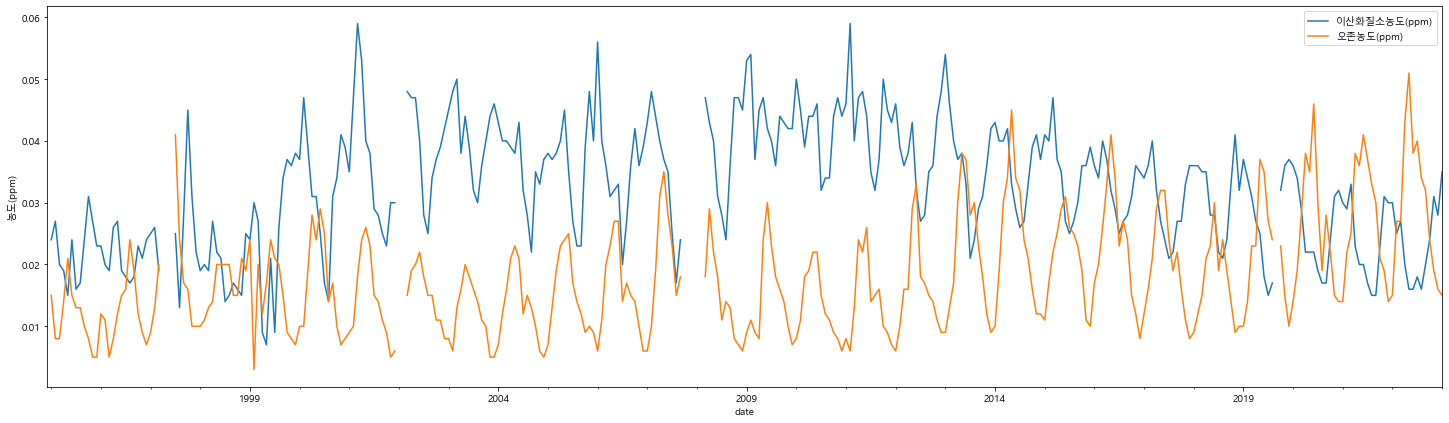

In [101]:
### 이산화질소, 오존 시계열 그래프

gangnam.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# y축 범위 문제 때문에 전반적으로 크기가 비슷한 컬럼들을 묶어서 그래프를 생성하였다 -> 이산화질소, 오존 / 아황산 / 일산화탄소 / 미세먼지, 초미세먼지
# 이산화질소와 오존이 무언가 반대의 경향성을 가지고 있는 것처럼 보이기도 하는데 이유는 알아봐야 할 것 같다.

Text(0.5, 0, 'date')

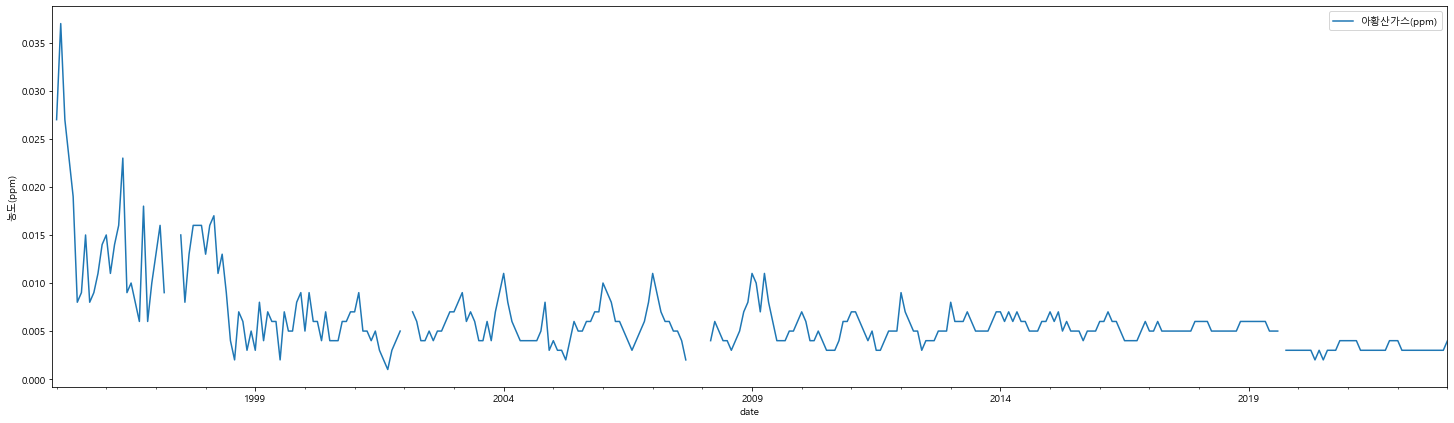

In [102]:
### 아황산가스 시계열 그래프

gangnam.plot(x='date', y=['아황산가스(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 아황산가스 농도는 1990년대 매우 높았다가 현재로 올수록 전반적으로 낮아지는 경향성을 띠는데, 어떤 변화가 있어서인지는 조사가 더 필요할 것 같다.

Text(0.5, 0, 'date')

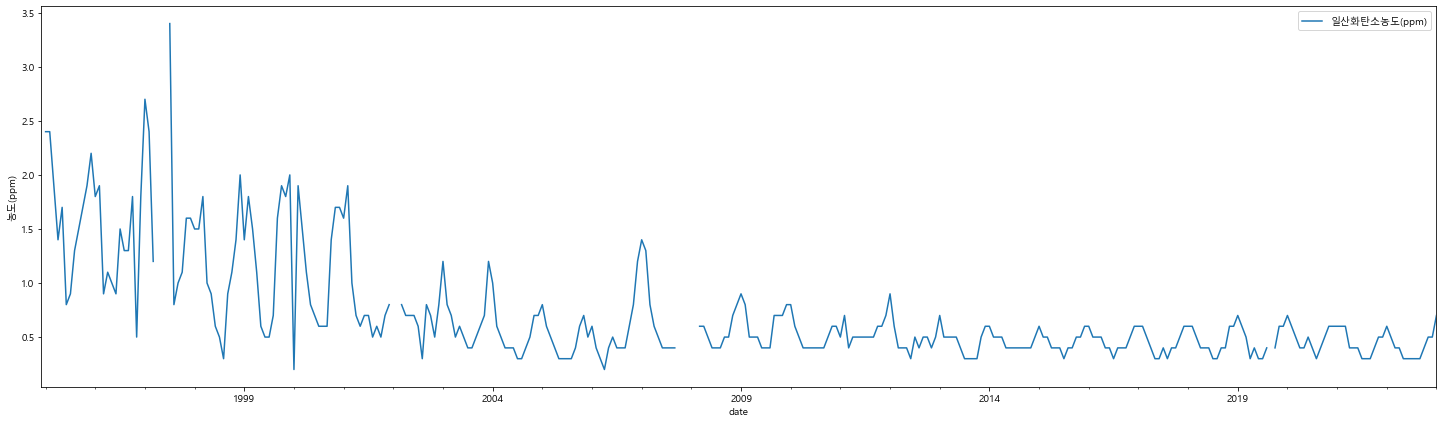

In [103]:
### 일산화탄소 시계열 그래프

gangnam.plot(x='date', y=['일산화탄소농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 일산화탄소 농도도 1990년대 매우 높았다가 현재로 올수록 전반적으로 낮아지는 경향성을 띠는데, 어떤 변화가 있어서인지는 조사가 더 필요할 것 같다.

Text(0.5, 0, 'date')

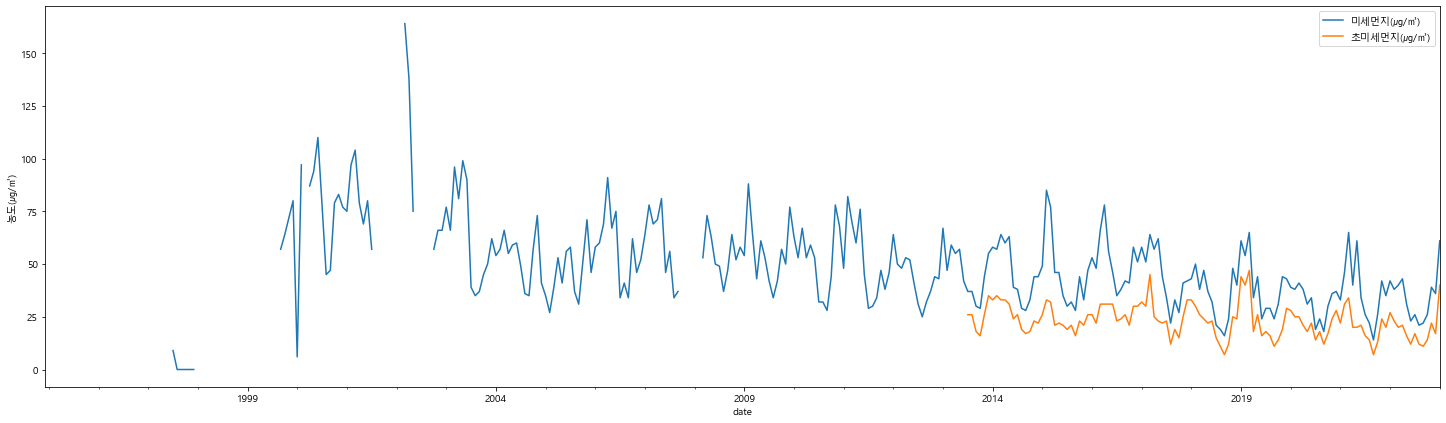

In [104]:
### 미세먼지, 초미세먼지 농도 시계열 그래프

gangnam.plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], figsize=(25, 7))

plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')

# 미세먼지와 초미세먼지는 경향성이 매우 비슷한 것을 확인할 수 있다.

##### 강남구 전체적인 경향성 정리

* 이산화질소가 증가하면 오존이 감소하는 식으로, 이산화질소와 오존이 무언가 반대의 경향성을 가지고 있는 것처럼 보인다.
* 아황산가스, 일산화탄소 농도가 1990년대 높았다가 현대로 올수록 낮아지고 있는데, 어떤 이유에서인지는 좀 더 조사가 필요할 것 같다. 정부 규제가 있었던 것일까?
* 미세먼지와 초미세먼지는 그 경향성이 매우 비슷하다.

##### **강남구 2020~2022년**

연도별 데이터와 달리 월별 데이터는 1년 중 월별로 어떠한 변화가 나타나는지 볼 수 있다는 장점이 있다.  
위에서는 전체 기간 동안의 전반적인 경향성을 파악했다면, 이번에는 2020년~2022년 3년간 월별 변화를 보다 자세히 살펴보고자 한다.

In [58]:
gangnam_20_22 = gangnam.loc[49:1800, :]
gangnam_20_22

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
50,202212,강남구,0.028,0.016,0.5,0.003,36.0,17.0,1,2022,12,2022-12-01
100,202211,강남구,0.031,0.019,0.5,0.003,39.0,22.0,1,2022,11,2022-11-01
150,202210,강남구,0.024,0.024,0.4,0.003,26.0,14.0,1,2022,10,2022-10-01
200,202209,강남구,0.020,0.032,0.3,0.003,22.0,11.0,1,2022,9,2022-09-01
250,202208,강남구,0.016,0.034,0.3,0.003,21.0,12.0,1,2022,8,2022-08-01
300,202207,강남구,0.018,0.040,0.3,0.003,26.0,17.0,1,2022,7,2022-07-01
350,202206,강남구,0.016,0.038,0.3,0.003,23.0,12.0,1,2022,6,2022-06-01
400,202205,강남구,0.016,0.051,0.3,0.003,31.0,16.0,1,2022,5,2022-05-01
450,202204,강남구,0.020,0.043,0.4,0.003,43.0,21.0,1,2022,4,2022-04-01
500,202203,강남구,0.027,0.027,0.4,0.003,40.0,20.0,1,2022,3,2022-03-01


Text(0.5, 0, 'date')

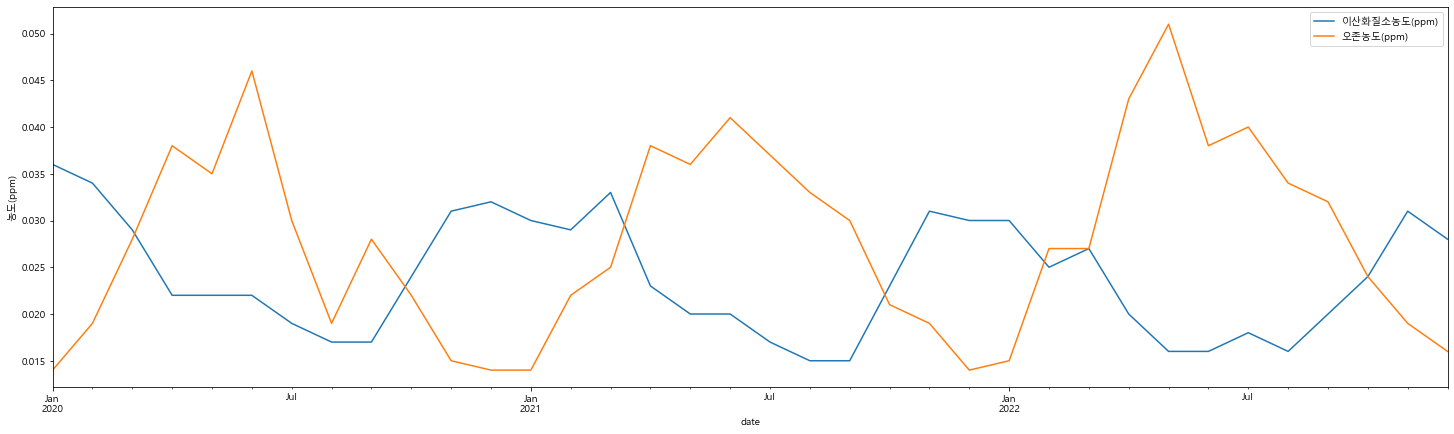

In [97]:
### 이산화질소, 오존 시계열 그래프

gangnam_20_22.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 이산화질소, 오존 농도가 마치 반비례하는 듯한 경향성을 다시 한번 확인할 수 있다. 이산화질소가 높을 때 오존은 낮고, 이산화질소가 낮을 때 오존은 높다.
# 이산화질소는 대체로 봄, 여름에 낮고 가을, 겨울철에 높고 / 오존은 대체로 봄, 여름철에 높고 가을, 겨울철에 낮은 경향성을 보이고 있다.
# 이산화질소와 오존 사이에 상호 관계가 있다기보다는 각각이 독립적으로 계절에 영향을 받고 있다고 해석하는 것이 보다 타당할 듯하다.

Text(0.5, 0, 'date')

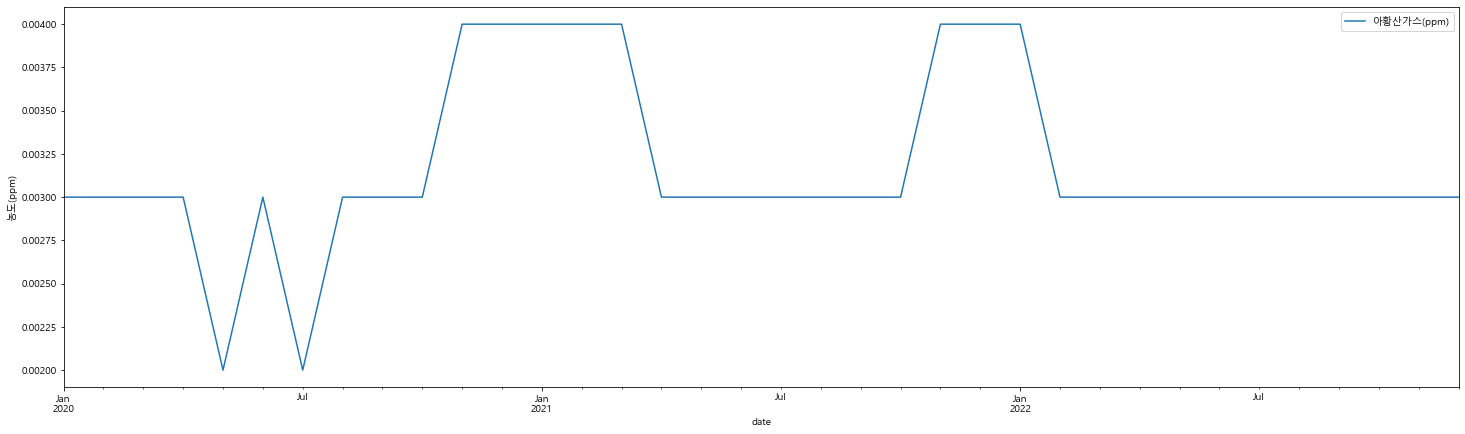

In [98]:
### 아황산가스 시계열 그래프

gangnam_20_22.plot(x='date', y=['아황산가스(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 아황산가스 또한 계절성이 있는 것으로 보인다. 대체로 겨울에 높고 여름에 낮은 경향을 띤다.

Text(0.5, 0, 'date')

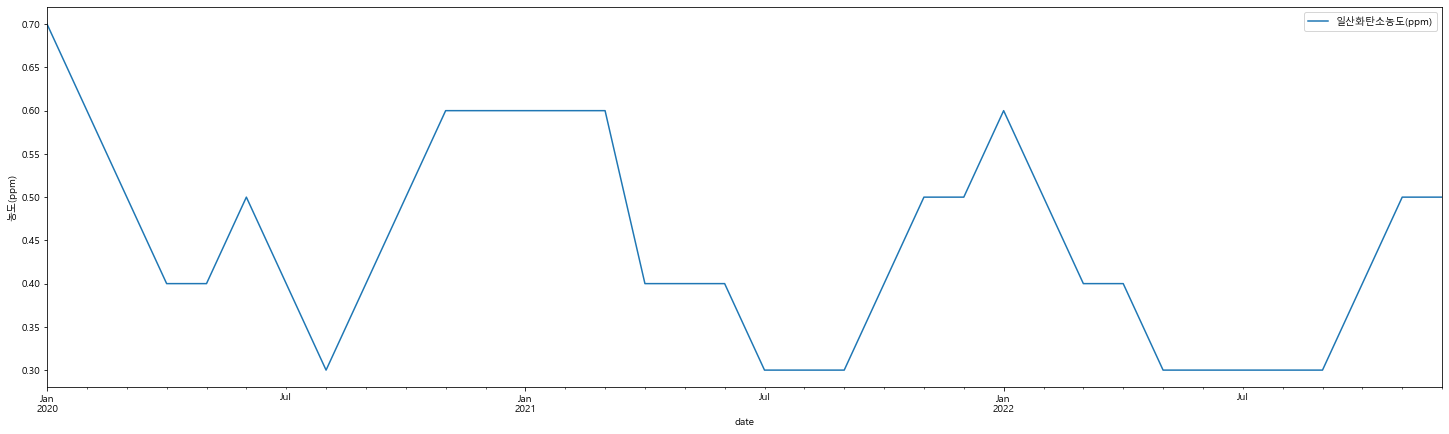

In [99]:
### 일산화탄소 시계열 그래프

gangnam_20_22.plot(x='date', y=['일산화탄소농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 일산화탄소 또한 계절성이 있는 것으로 보인다. 대체로 겨울에 높고 여름에 낮은 경향을 띤다.

Text(0.5, 0, 'date')

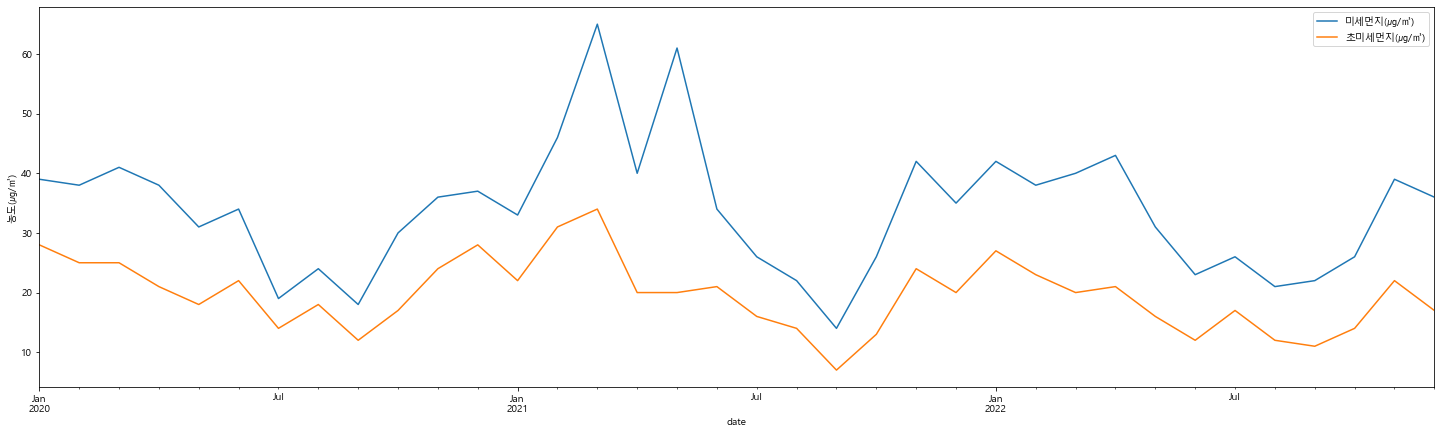

In [100]:
### 미세먼지, 초미세먼지 농도 시계열 그래프

gangnam_20_22.plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], figsize=(25, 7))

plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')

# 미세먼지와 초미세먼지는 경향성이 매우 비슷한 것을 다시 한번 확인할 수 있다.
# 또한 봄철에 미세먼지와 초미세먼지 농도가 상대적으로 높다는, 통념과 일치하는 결과를 확인할 수 있다.

##### 강남구 월별 경향성 정리

* 이산화질소, 오존, 아황산가스, 일산화탄소에 계절성이 있는 것으로 보인다.
* 이산화질소, 아황산가스, 일산화탄소: 봄, 여름에 낮고 가을, 겨울에 높음
* 오존: 봄, 여름에 높고 가을, 겨울에 낮음
* 미세먼지와 초미세먼지는 마찬가지로 일치하는 경향성을 띠며, 통념과 일치하게 주로 봄철에 증가하는 경향성을 확인할 수 있었다.

### 2. 도로

##### **강변북로 전체 연도 범위**

In [80]:
### 강변북로 데이터프레임 분리

riverrail = ATM_monthly_df.loc[ATM_monthly_df['측정소명'] == '강변북로']
riverrail.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,1,2023,1,2023-01-01
53,202212,강변북로,0.033,0.012,0.6,0.003,38.0,21.0,1,2022,12,2022-12-01
103,202211,강변북로,0.036,0.012,0.5,0.003,43.0,23.0,1,2022,11,2022-11-01
153,202210,강변북로,0.028,0.017,0.4,0.003,32.0,14.0,1,2022,10,2022-10-01
203,202209,강변북로,0.024,0.022,0.4,0.002,18.0,9.0,1,2022,9,2022-09-01
253,202208,강변북로,0.026,0.019,0.4,0.002,20.0,10.0,1,2022,8,2022-08-01
303,202207,강변북로,0.029,0.023,0.6,0.002,24.0,15.0,1,2022,7,2022-07-01
353,202206,강변북로,0.024,0.025,0.5,0.002,24.0,12.0,1,2022,6,2022-06-01
403,202205,강변북로,0.032,0.032,0.5,0.003,39.0,17.0,1,2022,5,2022-05-01
453,202204,강변북로,0.035,0.031,0.6,0.003,53.0,24.0,1,2022,4,2022-04-01


In [75]:
### 강변북로 최댓값, 최솟값, 평균

print('강변북로 최댓값: --------------------')
print(riverrail.max()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

print('\n강변북로 최솟값: --------------------')
print(riverrail.min()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

print('\n강변북로 평균: --------------------')
print(riverrail.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

강변북로 최댓값: --------------------
이산화질소농도(ppm)    0.073
오존농도(ppm)       0.032
일산화탄소농도(ppm)      1.1
아황산가스(ppm)      0.007
미세먼지(㎍/㎥)        96.0
초미세먼지(㎍/㎥)       50.0
dtype: object

강변북로 최솟값: --------------------
이산화질소농도(ppm)    0.019
오존농도(ppm)       0.005
일산화탄소농도(ppm)      0.3
아황산가스(ppm)      0.002
미세먼지(㎍/㎥)        12.0
초미세먼지(㎍/㎥)        7.0
dtype: object

강변북로 평균: --------------------
이산화질소농도(ppm)     0.046212
오존농도(ppm)        0.014106
일산화탄소농도(ppm)     0.588125
아황산가스(ppm)       0.004000
미세먼지(㎍/㎥)       49.550000
초미세먼지(㎍/㎥)      26.368000
dtype: float64


C:\Users\izzle\AppData\Local\Temp\ipykernel_7940\2048005691.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(riverrail.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])
C:\Users\izzle\AppData\Local\Temp\ipykernel_7940\2048005691.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(riverrail.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])


Text(0.5, 0, 'date')

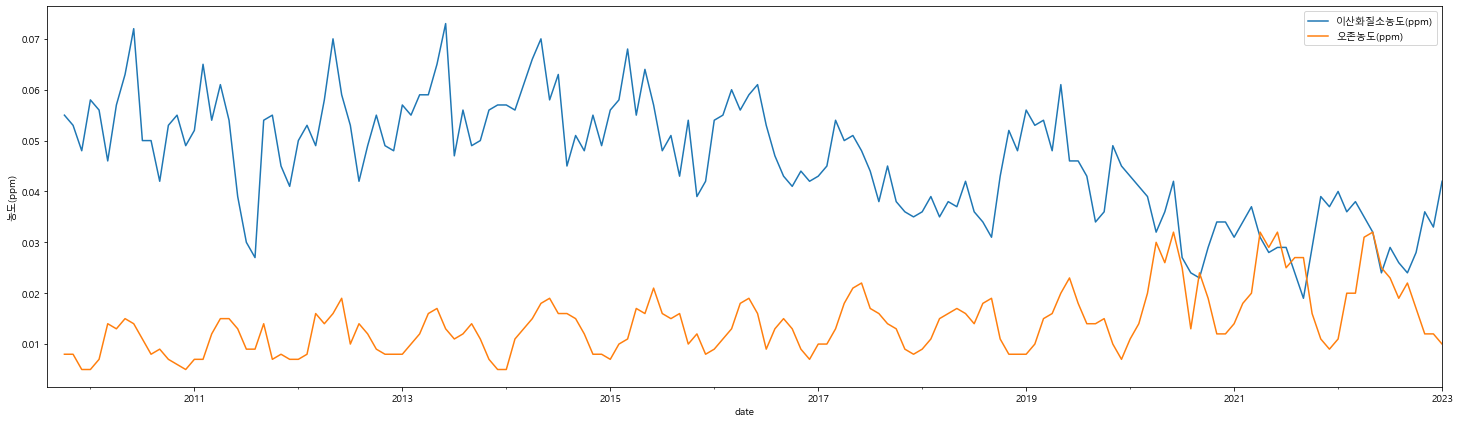

In [89]:
### 이산화질소, 오존 시계열 그래프

riverrail.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 강남구와 비교했을 때, 이산화질소 농도가 확실히 높다-> 이산화질소의 주 배출원인 자동차 배기가스가 원인인 것으로 보인다

Text(0.5, 0, 'date')

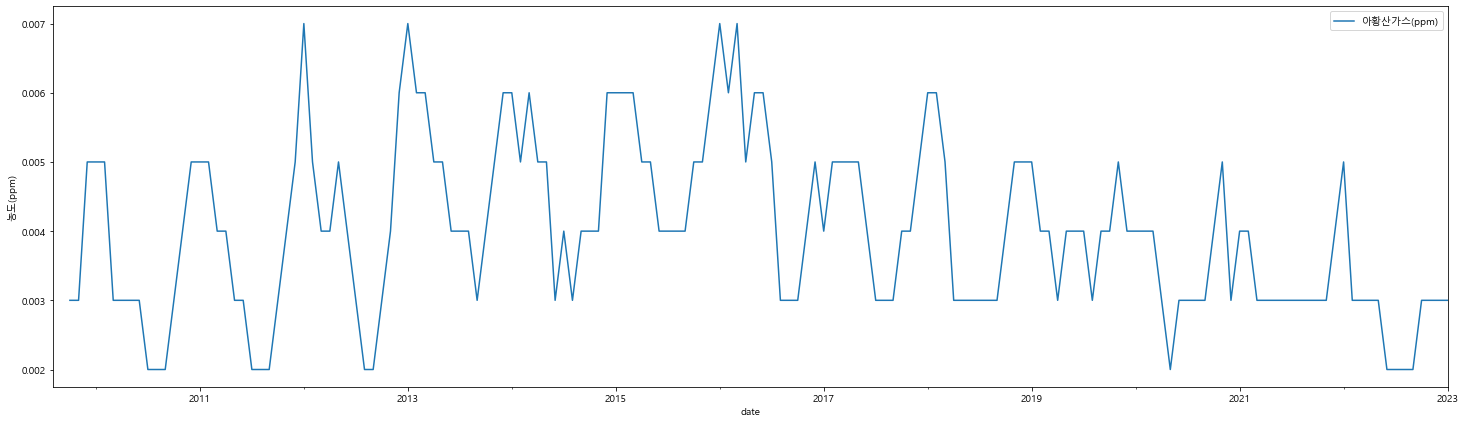

In [90]:
### 아황산가스 시계열 그래프

riverrail.plot(x='date', y=['아황산가스(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

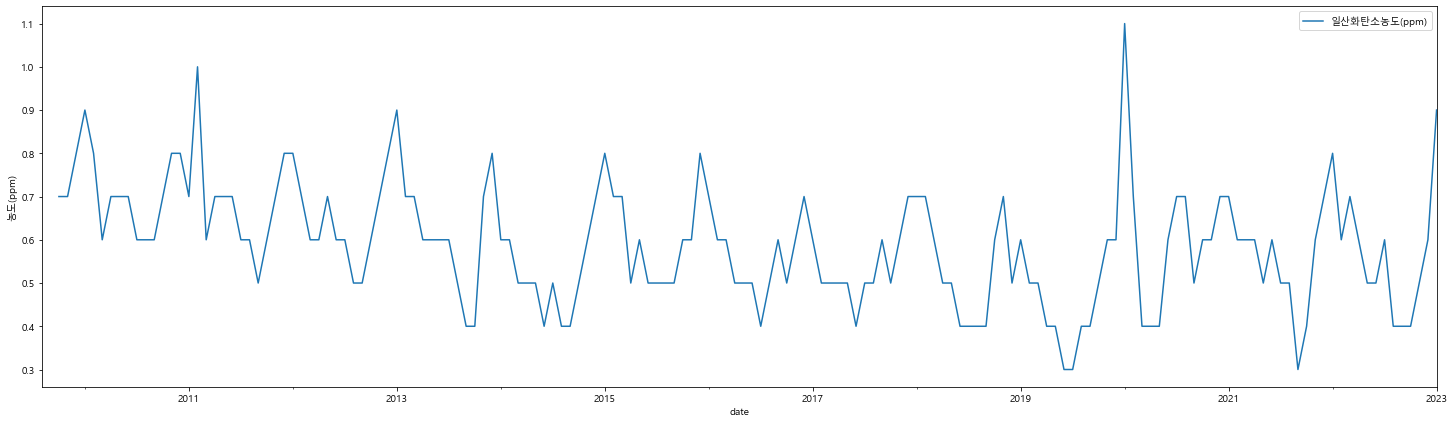

In [91]:
### 일산화탄소 시계열 그래프

riverrail.plot(x='date', y=['일산화탄소농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

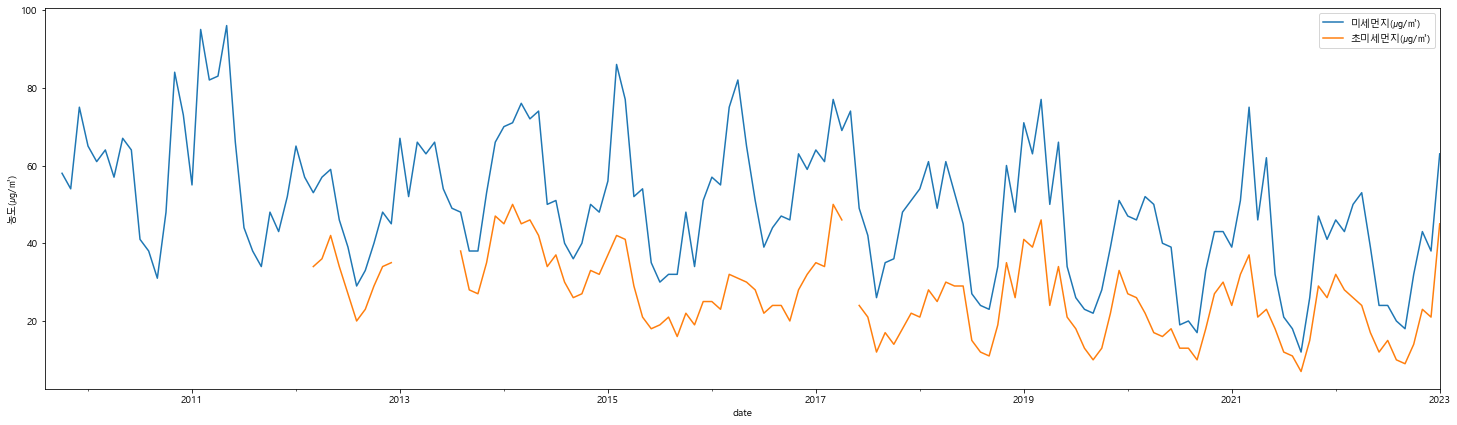

In [92]:
### 미세먼지, 초미세먼지 농도 시계열 그래프

riverrail.plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], figsize=(25, 7))

plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')

##### 강변북로 전체적인 경향성 정리

* 이산화질소의 농도가 강남구와 비교했을 때 확실히 높은 편인데, 이산화질소의 주 배출원인 자동차 배기가스가 원인인 것으로 생각된다.
* 강남구와 마찬가지로 아황산가스, 일산화탄소 농도가 1990년대 높았다가 현재로 올수록 낮아지는지 살펴보고 싶었는데 비교적 최근 데이터밖에 없다..
* 강남구와 마찬가지로 미세먼지와 초미세먼지는 그 경향성이 매우 비슷하다.

##### **강변북로 2020~2022년**

In [79]:
riverrail_20_22 = riverrail.loc[3:1804, :]
riverrail_20_22

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,1,2023,1,2023-01-01
53,202212,강변북로,0.033,0.012,0.6,0.003,38.0,21.0,1,2022,12,2022-12-01
103,202211,강변북로,0.036,0.012,0.5,0.003,43.0,23.0,1,2022,11,2022-11-01
153,202210,강변북로,0.028,0.017,0.4,0.003,32.0,14.0,1,2022,10,2022-10-01
203,202209,강변북로,0.024,0.022,0.4,0.002,18.0,9.0,1,2022,9,2022-09-01
253,202208,강변북로,0.026,0.019,0.4,0.002,20.0,10.0,1,2022,8,2022-08-01
303,202207,강변북로,0.029,0.023,0.6,0.002,24.0,15.0,1,2022,7,2022-07-01
353,202206,강변북로,0.024,0.025,0.5,0.002,24.0,12.0,1,2022,6,2022-06-01
403,202205,강변북로,0.032,0.032,0.5,0.003,39.0,17.0,1,2022,5,2022-05-01
453,202204,강변북로,0.035,0.031,0.6,0.003,53.0,24.0,1,2022,4,2022-04-01


Text(0.5, 0, 'date')

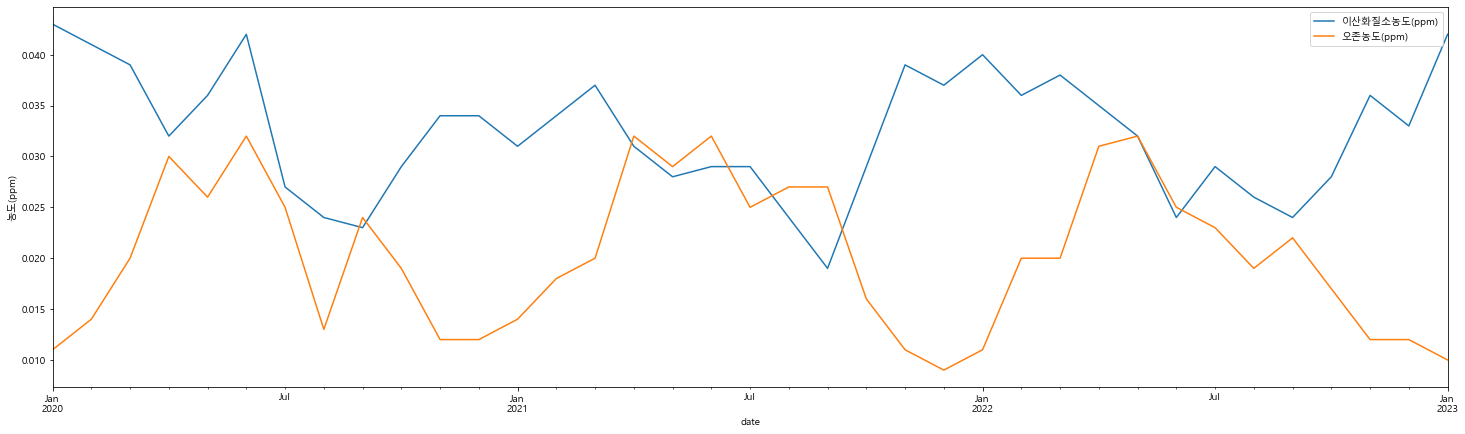

In [93]:
### 이산화질소, 오존 시계열 그래프

riverrail_20_22.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

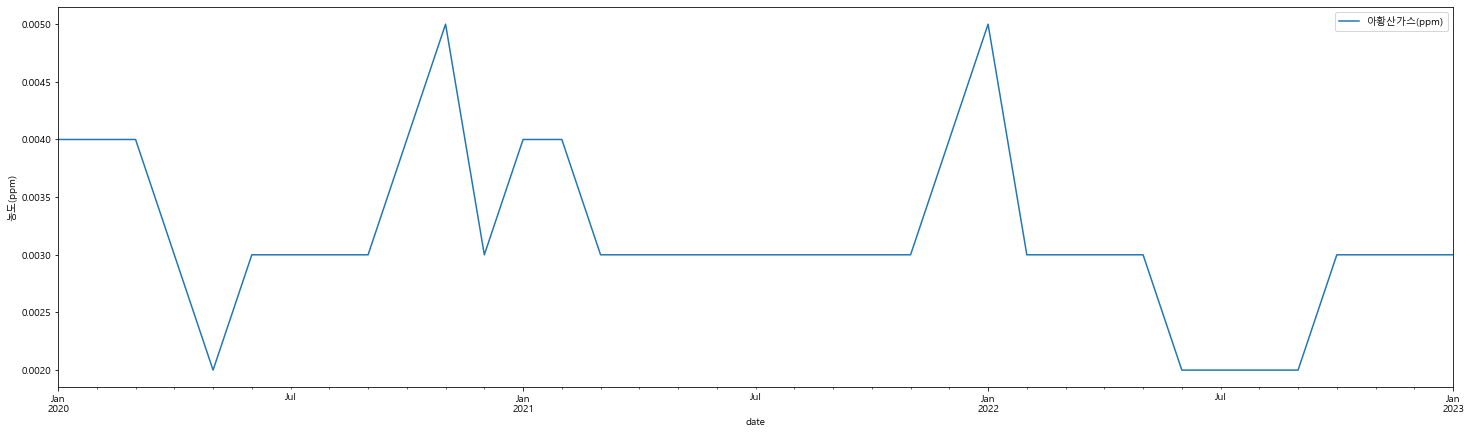

In [94]:
### 아황산가스 시계열 그래프

riverrail_20_22.plot(x='date', y=['아황산가스(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

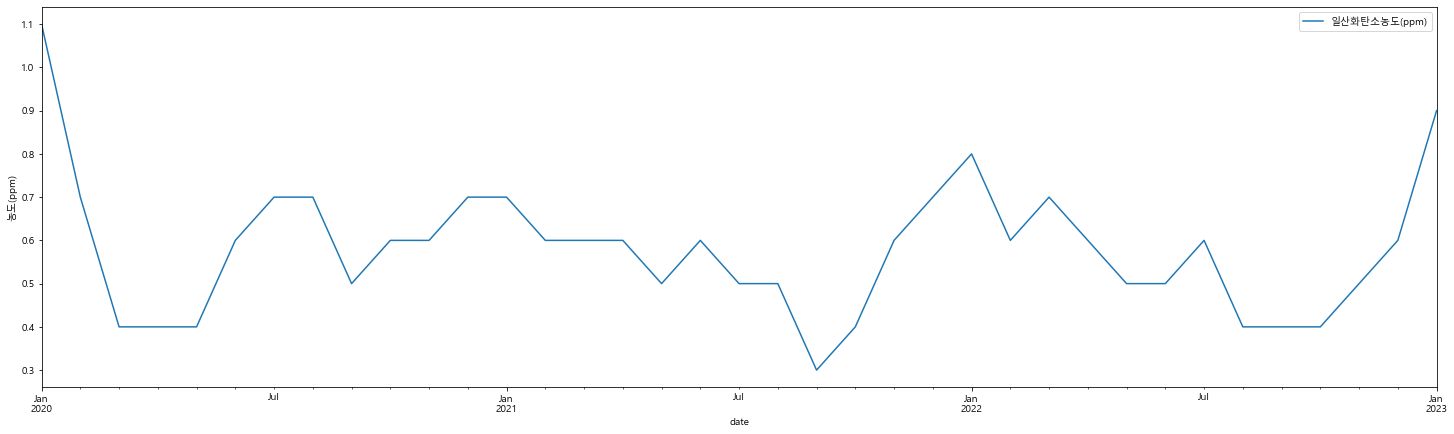

In [95]:
### 일산화탄소 시계열 그래프

riverrail_20_22.plot(x='date', y=['일산화탄소농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 겨울철에 특히 높은 것은 맞으나 그렇다고 여름철이 눈에 띄게 낮은 것도 아니다. 계절성이라기에 조금 애매하다.

Text(0.5, 0, 'date')

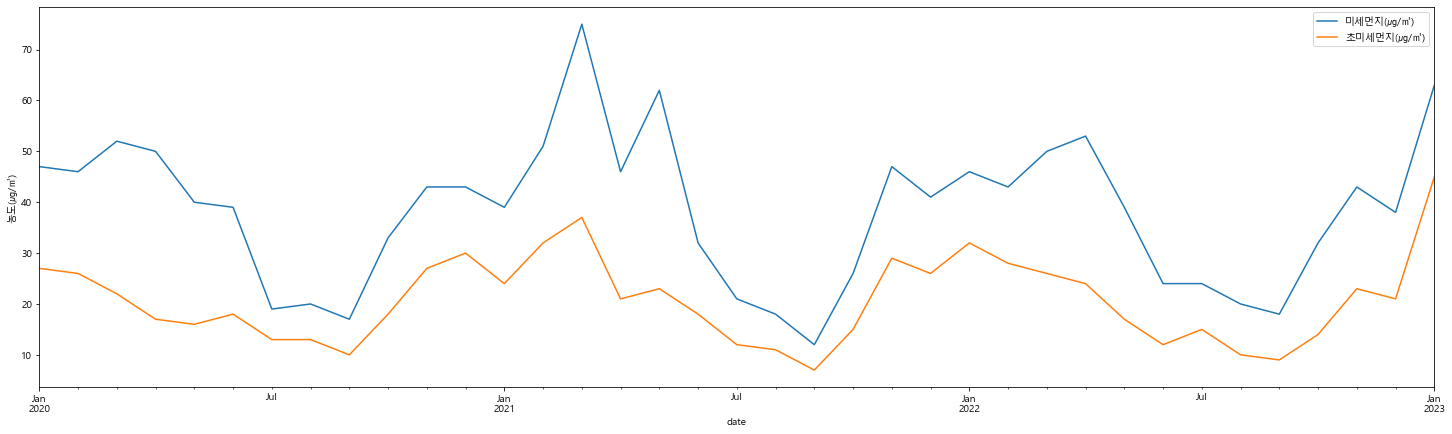

In [96]:
### 미세먼지, 초미세먼지 농도 시계열 그래프

riverrail_20_22.plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], figsize=(25, 7))

plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')

##### 강변북로 월별 경향성 정리

* 이산화질소, 오존, 아황산가스의 계절성은 대체로 들어맞는 것으로 보인다.
* 다만 일산화탄소의 경우 겨울철에 특히 높은 것은 맞으나 그렇다고 여름철이 눈에 띄게 낮은 것도 아니다. 계절성이라기에 조금 애매하다.
* 미세먼지와 초미세먼지는 마찬가지로 일치하는 경향성을 띠며, 통념과 일치하게 주로 봄철에 증가하는 경향성을 확인할 수 있었다.

### 3. 산

##### **관악산 전체 연도 범위**

In [112]:
### 관악산 데이터프레임 분리

mountain = ATM_monthly_df.loc[ATM_monthly_df['측정소명'] == '관악산']
mountain.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,1,2023,1,2023-01-01
58,202212,관악산,0.012,0.031,0.3,0.004,31.0,13.0,1,2022,12,2022-12-01
108,202211,관악산,0.011,0.042,0.2,0.003,37.0,19.0,1,2022,11,2022-11-01
158,202210,관악산,0.009,0.042,0.2,0.003,19.0,13.0,1,2022,10,2022-10-01
208,202209,관악산,0.006,0.046,0.2,0.002,19.0,9.0,1,2022,9,2022-09-01
258,202208,관악산,0.005,0.043,0.3,0.002,14.0,10.0,1,2022,8,2022-08-01
308,202207,관악산,0.006,0.049,0.4,0.002,22.0,16.0,1,2022,7,2022-07-01
358,202206,관악산,0.006,0.049,0.4,0.002,21.0,12.0,1,2022,6,2022-06-01
408,202205,관악산,0.007,0.064,0.5,0.003,33.0,17.0,1,2022,5,2022-05-01
458,202204,관악산,0.008,0.060,0.4,0.003,38.0,19.0,1,2022,4,2022-04-01


In [86]:
### 관악산 최댓값, 최솟값, 평균

print('관악산 최댓값: --------------------')
print(mountain.max()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

print('\n관악산 최솟값: --------------------')
print(mountain.min()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

print('\n관악산 평균: --------------------')
print(mountain.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])

관악산 최댓값: --------------------
이산화질소농도(ppm)    0.016
오존농도(ppm)       0.064
일산화탄소농도(ppm)      0.6
아황산가스(ppm)      0.006
미세먼지(㎍/㎥)        63.0
초미세먼지(㎍/㎥)       36.0
dtype: object

관악산 최솟값: --------------------
이산화질소농도(ppm)    0.005
오존농도(ppm)       0.014
일산화탄소농도(ppm)      0.2
아황산가스(ppm)      0.002
미세먼지(㎍/㎥)        13.0
초미세먼지(㎍/㎥)        5.0
dtype: object

관악산 평균: --------------------
이산화질소농도(ppm)     0.010412
오존농도(ppm)        0.036961
일산화탄소농도(ppm)     0.371739
아황산가스(ppm)       0.003490
미세먼지(㎍/㎥)       34.352941
초미세먼지(㎍/㎥)      18.196078
dtype: float64


C:\Users\izzle\AppData\Local\Temp\ipykernel_7940\3072751697.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(mountain.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])
C:\Users\izzle\AppData\Local\Temp\ipykernel_7940\3072751697.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mountain.mean()[['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']])


Text(0.5, 0, '측정월')

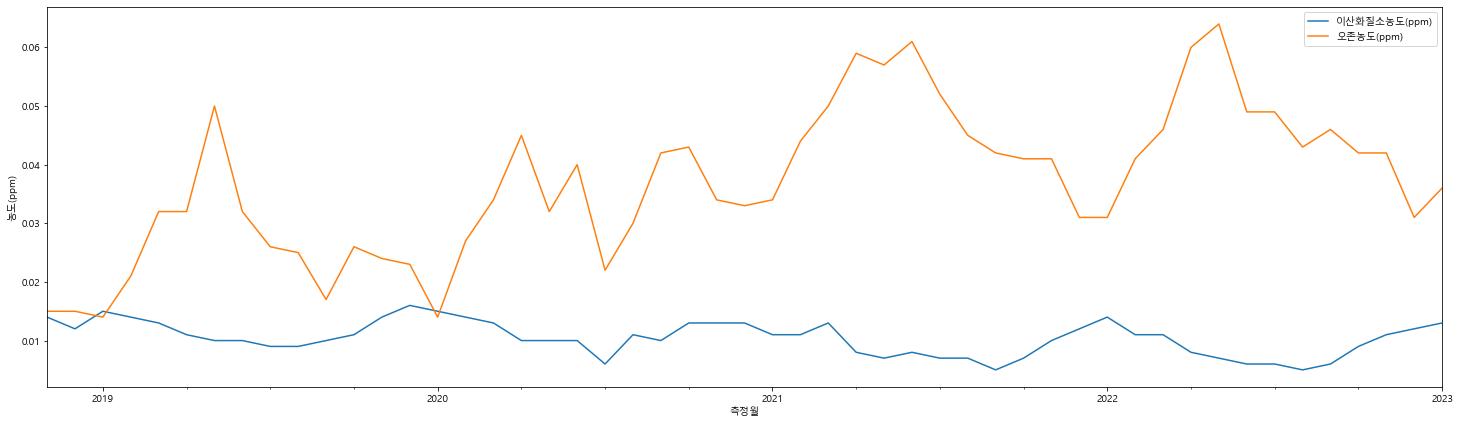

In [87]:
### 이산화질소, 오존 시계열 그래프

mountain.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 이산화질소 농도는 확실히 낮은데, 오존은 오히려 도심, 도로 지역보다 높다.

Text(0.5, 0, '측정월')

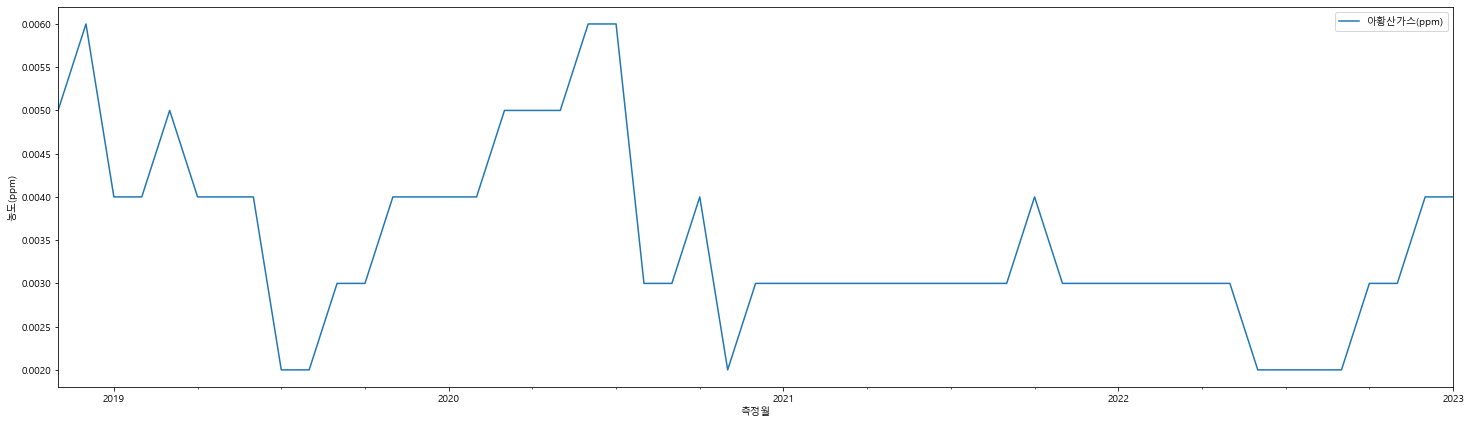

In [88]:
### 아황산가스 시계열 그래프

mountain.plot(x='date', y=['아황산가스(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

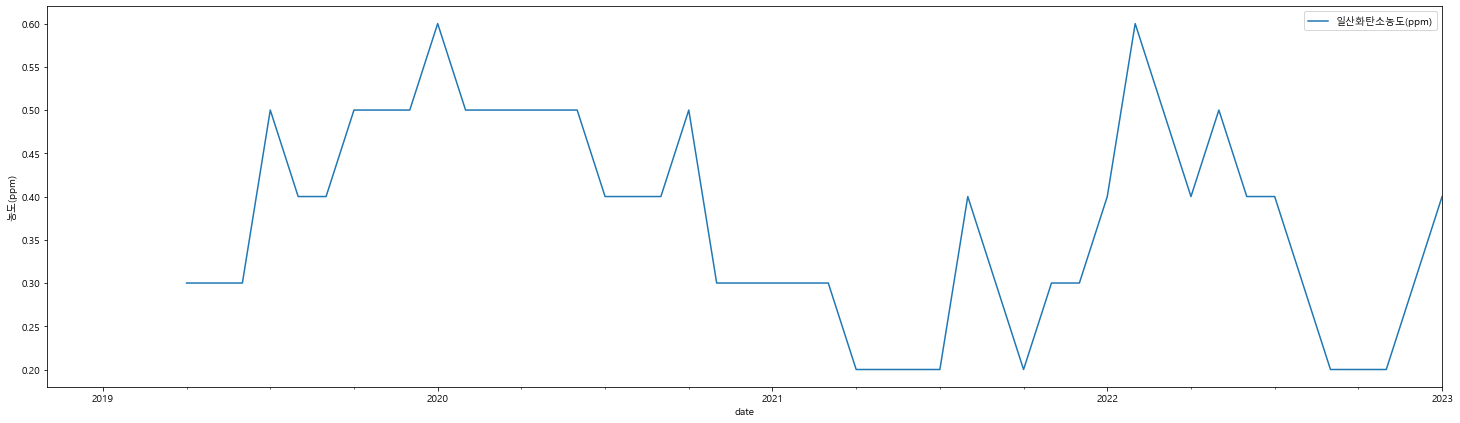

In [105]:
### 일산화탄소 시계열 그래프

mountain.plot(x='date', y=['일산화탄소농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

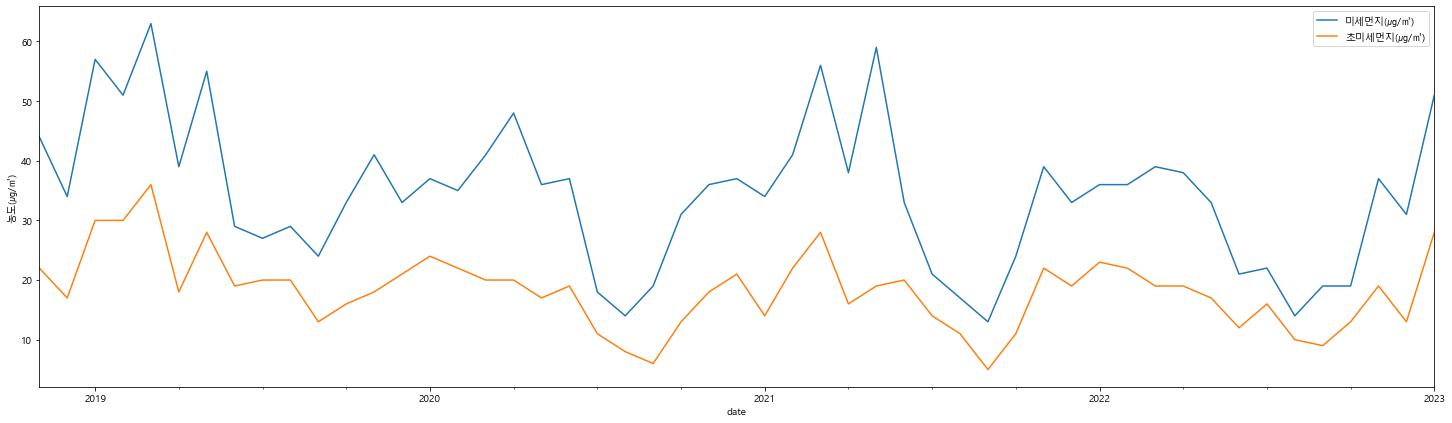

In [106]:
### 미세먼지, 초미세먼지 농도 시계열 그래프

mountain.plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], figsize=(25, 7))

plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')

##### **관악산 2020~2022년**

In [111]:
mountain_20_22 = mountain.loc[8:1809, :]
mountain_20_22

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,1,2023,1,2023-01-01
58,202212,관악산,0.012,0.031,0.3,0.004,31.0,13.0,1,2022,12,2022-12-01
108,202211,관악산,0.011,0.042,0.2,0.003,37.0,19.0,1,2022,11,2022-11-01
158,202210,관악산,0.009,0.042,0.2,0.003,19.0,13.0,1,2022,10,2022-10-01
208,202209,관악산,0.006,0.046,0.2,0.002,19.0,9.0,1,2022,9,2022-09-01
258,202208,관악산,0.005,0.043,0.3,0.002,14.0,10.0,1,2022,8,2022-08-01
308,202207,관악산,0.006,0.049,0.4,0.002,22.0,16.0,1,2022,7,2022-07-01
358,202206,관악산,0.006,0.049,0.4,0.002,21.0,12.0,1,2022,6,2022-06-01
408,202205,관악산,0.007,0.064,0.5,0.003,33.0,17.0,1,2022,5,2022-05-01
458,202204,관악산,0.008,0.060,0.4,0.003,38.0,19.0,1,2022,4,2022-04-01


Text(0.5, 0, 'date')

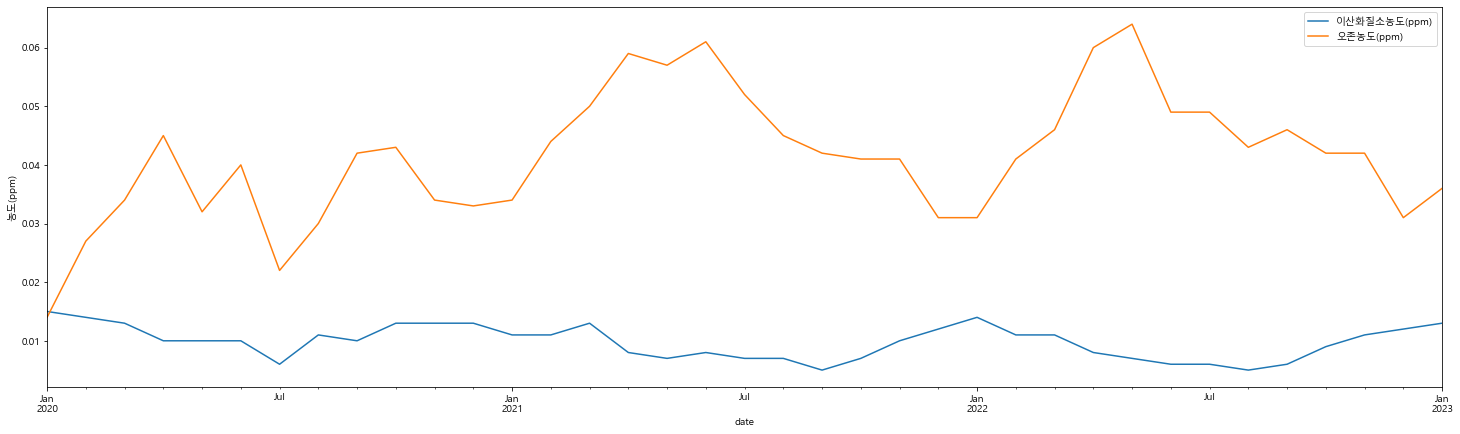

In [113]:
### 이산화질소, 오존 시계열 그래프

mountain_20_22.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

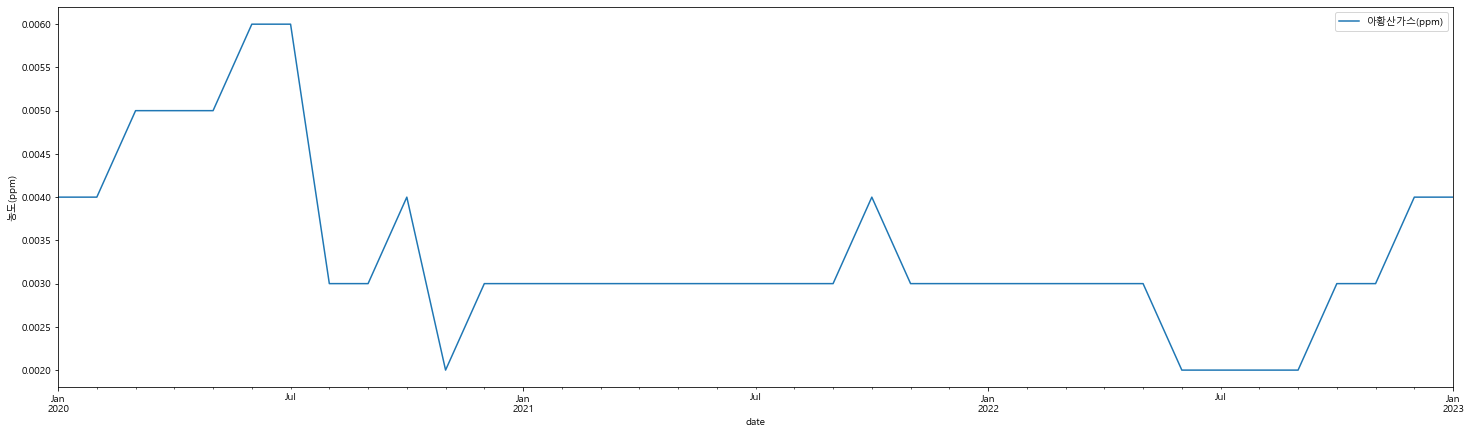

In [114]:
### 아황산가스 시계열 그래프

mountain_20_22.plot(x='date', y=['아황산가스(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

Text(0.5, 0, 'date')

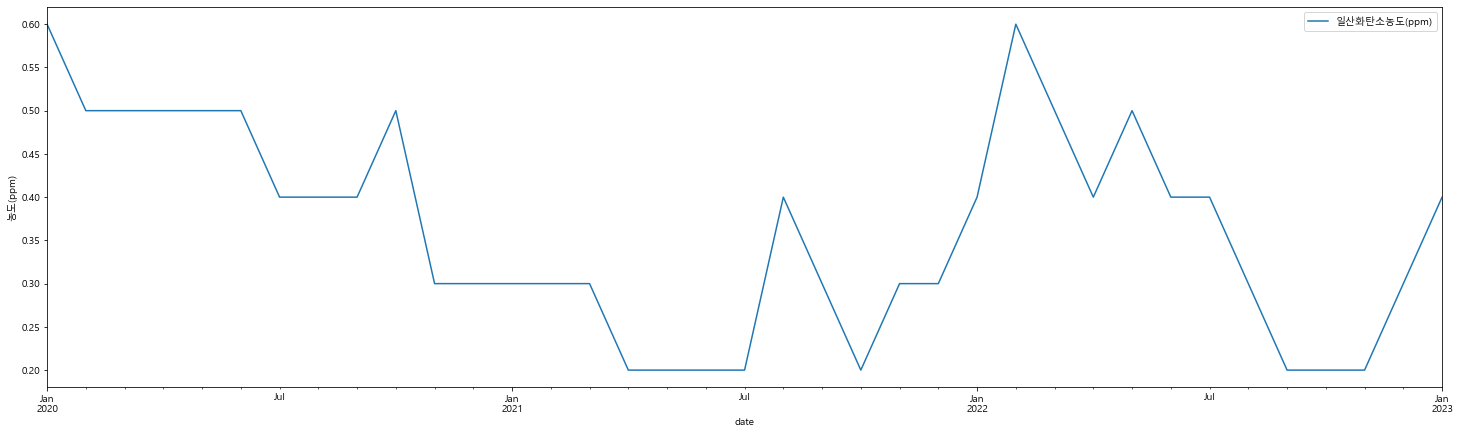

In [115]:
### 일산화탄소 시계열 그래프

mountain_20_22.plot(x='date', y=['일산화탄소농도(ppm)'], figsize=(25, 7))

plt.ylabel('농도(ppm)')
plt.xlabel('date')

# 겨울철에 특히 높은 것은 맞으나 그렇다고 여름철이 눈에 띄게 낮은 것도 아니다. 계절성이라기에 조금 애매하다.

Text(0.5, 0, 'date')

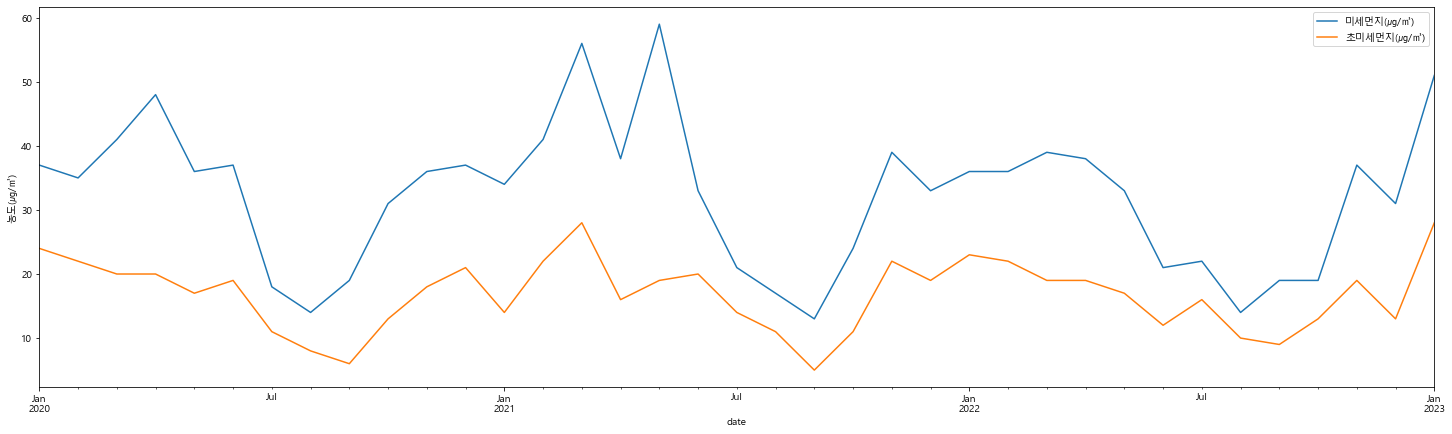

In [116]:
### 미세먼지, 초미세먼지 농도 시계열 그래프

mountain_20_22.plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], figsize=(25, 7))

plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')

##### 더 하고 싶은 것

* 2023년 1월, 2022년 1월, 2021년 1월... 이렇게 1월끼리 평균 내서 월별로 비교를 해보고 싶었는데 시간상 아직 못했습니다..ㅠㅠ